In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import time
from datetime import datetime
from scipy import integrate, optimize
import warnings
warnings.filterwarnings('ignore')

# ML libraries
import lightgbm as lgb
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import linear_model
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
#Libraries to import

import datetime as dt
import requests
import sys
from itertools import chain

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import plot_importance, plot_tree
from sklearn.model_selection import GridSearchCV

In [ ]:
data= pd.read_csv("after_SQL.csv")
data.head()


,O_Date,O_Location,P_Class,Contrast,BC
0,2/1/22,BELLEVUE HOSPITAL CENTER,Emergency,46,1
1,2/1/22,BELLEVUE HOSPITAL CENTER,Inpatient,13,1
2,2/1/22,BELLEVUE HOSPITAL CENTER,Outpatient,66,1
3,2/1/22,CONEY ISLAND HOSPITAL CENTER,Emergency,25,1
4,2/1/22,CONEY ISLAND HOSPITAL CENTER,Inpatient,6,1


In [ ]:
df=data
df.describe()

,Contrast,BC
count,5604.000000,5604.000000
mean,12.786403,0.571734
std,14.119776,0.494872
min,0.000000,0.000000
25%,2.000000,0.000000
50%,8.000000,1.000000
75%,19.000000,1.000000
max,89.000000,1.000000


In [ ]:
x_aug=pd.read_excel('Aug.xlsx')
x_aug.head(2)

,O_Date,O_Location,P_Class,BC
0,2022-08-01,BELLEVUE HOSPITAL CENTER,Emergency,0
1,2022-08-01,BELLEVUE HOSPITAL CENTER,Inpatient,0


In [ ]:
df["O_Date"] = pd.to_datetime(df["O_Date"])
#data["DayOfWeek"] = data["O_Date"].dt.weekday
df["IsWeekend"] = df["O_Date"].dt.weekday >= 5
df.head()

,O_Date,O_Location,P_Class,Contrast,BC,IsWeekend
0,2022-02-01,BELLEVUE HOSPITAL CENTER,Emergency,46,1,False
1,2022-02-01,BELLEVUE HOSPITAL CENTER,Inpatient,13,1,False
2,2022-02-01,BELLEVUE HOSPITAL CENTER,Outpatient,66,1,False
3,2022-02-01,CONEY ISLAND HOSPITAL CENTER,Emergency,25,1,False
4,2022-02-01,CONEY ISLAND HOSPITAL CENTER,Inpatient,6,1,False


In [ ]:
x_aug["O_Date"] = pd.to_datetime(x_aug["O_Date"])
#data["DayOfWeek"] = data["O_Date"].dt.weekday
x_aug["IsWeekend"] = x_aug["O_Date"].dt.weekday >= 5
x_aug.head(2)

,O_Date,O_Location,P_Class,BC,IsWeekend
0,2022-08-01,BELLEVUE HOSPITAL CENTER,Emergency,0,False
1,2022-08-01,BELLEVUE HOSPITAL CENTER,Inpatient,0,False


In [ ]:
le = preprocessing.LabelEncoder()
data=df.apply(le.fit_transform)
data.loc[:, ['O_Date','Contrast','BC']] = df[['O_Date','Contrast','BC']]
data.head(2)

,O_Date,O_Location,P_Class,Contrast,BC,IsWeekend
0,2022-02-01,0,0,46,1,0
1,2022-02-01,0,1,13,1,0


In [ ]:
le = preprocessing.LabelEncoder()
xag=x_aug.apply(le.fit_transform)
xag.loc[:, ['O_Date','BC']] = x_aug[['O_Date','BC']]
xag.head(2)

,O_Date,O_Location,P_Class,BC,IsWeekend
0,2022-08-01,0,0,0,0
1,2022-08-01,0,1,0,0


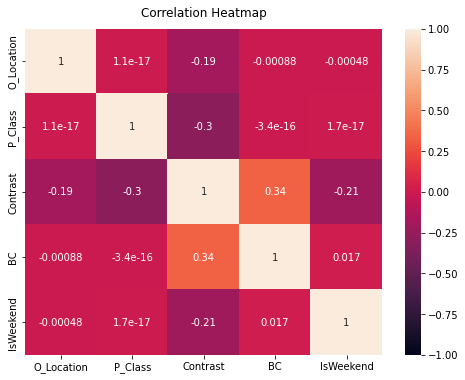

In [ ]:
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.savefig("Corr-HM-df1.png")

In [ ]:
from sklearn.model_selection import train_test_split
#After getting new data

In [ ]:
train_date_min = data['O_Date'].min()
train_date_max = data['O_Date'].max()
print('Minimum date from training set: {}'.format(train_date_min))
print('Maximum date from training set: {}'.format(train_date_max))

Minimum date from training set: 2022-02-01 00:00:00
Maximum date from training set: 2022-07-20 00:00:00


> **Modeling**

In [ ]:
da= pd.to_datetime(data['O_Date'], errors='coerce')
data['O_Date']= da.dt.strftime("%Y%m%d").astype(int)
# da= pd.to_datetime(test['Order_Date'], errors='coerce')
# test['Order_Date']= da.dt.strftime("%Y%m%d").astype(int)

In [ ]:
da= pd.to_datetime(xag['O_Date'], errors='coerce')
xag['O_Date']= da.dt.strftime("%Y%m%d").astype(int)

In [ ]:
data.head()

,O_Date,O_Location,P_Class,Contrast,BC,IsWeekend
0,20220201,0,0,46,1,0
1,20220201,0,1,13,1,0
2,20220201,0,2,66,1,0
3,20220201,1,0,25,1,0
4,20220201,1,1,6,1,0


In [ ]:
y_train=data['Contrast']
x_train=data.drop(['Contrast'],axis=1)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

print(lin_reg.intercept_)
print(lin_reg.coef_)

-121434.8279239906
[ 6.00641430e-03 -8.36646305e-01 -5.28920288e+00  1.12722386e+01
 -6.68276783e+00]


In [ ]:
lin_score=lin_reg.score(x_test,y_test)
print(f'Linear regression R2 test score: {lin_score}')

Linear regression R2 test score: 0.2774657166887178


Linear Regression performs poorly.

**Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg2=PolynomialFeatures(degree=2)
x_poly=poly_reg2.fit_transform(x_train)
lin_reg_2=LinearRegression()
lin_reg_2.fit(x_poly,y_train)
lin_reg_2.score(x_poly,y_train)
#print("Coefficients of polynimial(degree2) are", lin_reg_2.coef_)

0.41724048475122477

**Random Forest**

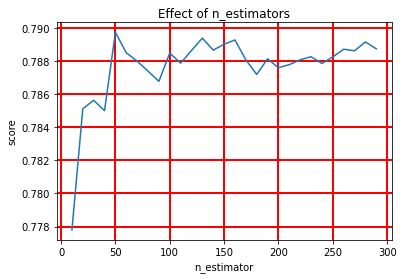

In [ ]:
#comparing estimators
from sklearn.ensemble import RandomForestRegressor 
model = RandomForestRegressor(n_jobs=-1)
estimators = np.arange(10, 300, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(x_train, y_train)
    scores.append(model.score(x_test, y_test))
plt.grid(color='r', linestyle='-', linewidth=2)
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")

plt.plot(estimators, scores)

In [ ]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 90, bootstrap=True, random_state = 42,)
# Train the model on training data
rf.fit(x_train, y_train);
# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
rf.score(x_train, y_train)

Mean Absolute Error: 4.27 degrees.


0.9431780798341898

In [ ]:
pred = rf.predict(x_train)
print(mean_squared_error(y_train,pred))
print(mean_squared_error(y_test,predictions))
rf.score(x_test, y_test)

11.13515553295333
44.267535769302384


0.7881515985492451

The performance of the RF is well.

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)
# Use the forest's predict method on the test data
predictions = tree_reg.predict(x_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
print(tree_reg.score(x_train, y_train))
#bias_variance_decomp(tree_reg, x_train.values, y_train.values, x_test.values, y_test.values,'mse', random_seed=123)

Mean Absolute Error: 5.06 degrees.
0.9607980114117025


In [ ]:
pred = tree_reg.predict(x_train)
print(mean_squared_error(y_train,pred))
print(mean_squared_error(y_test,predictions))
tree_reg.score(x_test, y_test)

7.682250773257198
59.95374335791895


0.7130830873994208

**XGBOOST**

In [ ]:
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE

[13:19:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:19:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:19:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:19:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:19:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:19:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:19:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:19:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

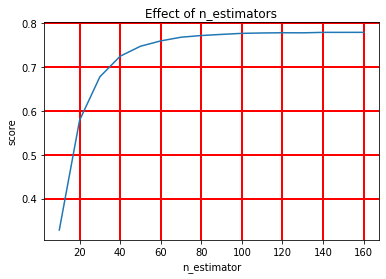

In [ ]:
model = XGBRegressor(n_jobs=-1)
estimators = np.arange(10, 170, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(x_train, y_train)
    scores.append(model.score(x_test, y_test))
plt.grid(color='r', linestyle='-', linewidth=2)
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")

plt.plot(estimators, scores)

In [ ]:
# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear', n_estimators = 110, seed = 123)
 
# Fitting the model
xgb_r.fit(x_train, y_train)
 
# Predict the model
pred = xgb_r.predict(x_test)
 
# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
train_score=xgb_r.score(x_train,y_train)
score=xgb_r.score(x_test,y_test)
print("Train R2 score: % f"%(train_score))
print("RMSE : % f" %(rmse))
print("Test R2 score: % f"%(score))

[13:19:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train R2 score:  0.773425
RMSE :  6.807617
Test R2 score:  0.778216


In [ ]:
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(x_train, y_train)
pred=knn.predict(x_test)
train_r2=knn.score(x_train, y_train)
test_r2=knn.score(x_test, y_test)
print("train r2:", train_r2)
print("test r2", test_r2)

train r2: 0.6739491897962742
test r2 0.41956568824256524


In [ ]:
clf = ExtraTreesRegressor(n_estimators=120,max_features='auto', verbose=1, n_jobs=1)
clf.fit(x_train, y_train)
pred=clf.predict(x_test)
train_r2=clf.score(x_train, y_train)
test_r2=clf.score(x_test, y_test)
print("train r2:", train_r2)
print("test r2", test_r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


train r2: 0.9607979555117725
test r2 0.7531468224811791


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.1s finished


In [ ]:
clf = RandomForestRegressor(n_estimators=110, criterion="absolute_error", max_depth=9, min_samples_split=3, 
                            min_samples_leaf=3, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, 
                            min_impurity_decrease=0.0, bootstrap=True, oob_score=1, n_jobs=-1, random_state=142, 
                            verbose=0, warm_start=False, ccp_alpha=0.001, max_samples=None)
clf.fit(x_train, y_train)
pred=clf.predict(x_test)
train_r2=clf.score(x_train, y_train)
test_r2=clf.score(x_test, y_test)
print("train r2:", train_r2)
print("test r2:", test_r2)

train r2: 0.8668342558749842
test r2: 0.8312481902924911


In [ ]:
pred

array([12.63181818, 10.45      , 13.64090909, ..., 18.96363636,
        0.        , 15.55909091])

In [ ]:
pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
import pydot

In [ ]:
feature_list = list(x_train.columns)
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=20, max_depth = 5)
rf_small.fit(x_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

#Augmented Data

In [ ]:
#Try the model on augmented data
pred=clf.predict(xag)
pred.sum()

8413.863636363636